# Rewards

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from glob import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json

import textstat
import nltk


In [2]:
file_zip = 'insert path of the folder of the data'       #"C:\\Users\\aless\\Desktop\\reddit_distr\\posts"

os.chdir(file_zip)

print("Files estratti:")
print(os.listdir())

Files estratti:
['r_ethtrader_comments_2016.jsonl', 'r_ethtrader_comments_2017.jsonl', 'r_ethtrader_comments_2018.jsonl', 'r_ethtrader_comments_2018_bkp.jsonl', 'r_ethtrader_comments_2019.jsonl', 'r_ethtrader_comments_2020.jsonl', 'r_ethtrader_comments_2021.jsonl', 'r_ethtrader_comments_2022.jsonl', 'r_ethtrader_comments_2023.jsonl', 'r_ethtrader_posts_2016.jsonl', 'r_ethtrader_posts_2017.jsonl', 'r_ethtrader_posts_2018.jsonl', 'r_ethtrader_posts_2019.jsonl', 'r_ethtrader_posts_2020.jsonl', 'r_ethtrader_posts_2021.jsonl', 'r_ethtrader_posts_2022.jsonl', 'r_ethtrader_posts_2023.jsonl']


In [3]:
rewards=sorted(os.listdir())
rewards=rewards[9:]
rewards

['r_ethtrader_posts_2016.jsonl',
 'r_ethtrader_posts_2017.jsonl',
 'r_ethtrader_posts_2018.jsonl',
 'r_ethtrader_posts_2019.jsonl',
 'r_ethtrader_posts_2020.jsonl',
 'r_ethtrader_posts_2021.jsonl',
 'r_ethtrader_posts_2022.jsonl',
 'r_ethtrader_posts_2023.jsonl']

In [4]:
selected_file = rewards
all_data=pd.DataFrame()
for i in selected_file:
  print(i)
  author=[]
  text=[]
  up_down=[]
  year=[]
  retrieved_on=[]
  retrieved_utc=[]
  created_utc=[]
  link_flair_text=[]
  num_comments=[]
  with open(i, 'r', encoding='UTF-8') as f:
      for line in f:
        line=json.loads(line)
        author.append(line['author'])
        all_text=line['title'] + line['selftext']
        text.append(all_text.replace('\n', ' '))
        up_down.append(line['ups'])
        retrieved_on.append(line.get('retrieved_on', np.nan))
        retrieved_utc.append(line.get('retrieved_utc', np.nan))
        created_utc.append(line.get('created_utc', np.nan))
        link_flair_text.append(line.get('link_flair_text', np.nan))
        num_comments.append(line.get('num_comments', np.nan))
        if '2016' in i:
          year.append('2016')
        elif '2017' in i:
          year.append('2017')
        elif '2018' in i:
          year.append('2018')
        elif '2019' in i:
          year.append('2019')
        elif '2020' in i:
          year.append('2020')
        elif '2021' in i:
          year.append('2021')
        elif '2022' in i:
          year.append('2022')
        elif '2023' in i:
          year.append('2023')
          

  data = pd.DataFrame({
      'Author': author,
      'Text': text,
      'Up-Down': up_down,
      'Year': year,
      'retrieved_utc': retrieved_utc,
      'created_utc': created_utc,
      'Retrieved_on': retrieved_on,
      'num_comments': num_comments
    })
  all_data = pd.concat([all_data, data], ignore_index=True)

all_data=all_data[all_data['Author']!='[deleted]']
all_data

r_ethtrader_posts_2016.jsonl
r_ethtrader_posts_2017.jsonl
r_ethtrader_posts_2018.jsonl
r_ethtrader_posts_2019.jsonl
r_ethtrader_posts_2020.jsonl
r_ethtrader_posts_2021.jsonl
r_ethtrader_posts_2022.jsonl
r_ethtrader_posts_2023.jsonl


,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,NaN,1427296704,1.440833e+09,9
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,NaN,1427369350,1.440832e+09,27
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,NaN,1427582991,1.440827e+09,7
4,heliumcraft,What software do you use for trading?,3,2016,NaN,1428015859,1.440817e+09,2
5,carlslarson,What factors will influence the price of Ether?,9,2016,NaN,1430401513,1.440763e+09,11
...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1


In [5]:
all_data['Retrieved_on'] = all_data['Retrieved_on'].fillna(all_data['retrieved_utc'])

all_data[all_data['Retrieved_on'].isnull()]

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments
351844,Sybil_White,Blockonomics Empowers Global Merchants Through...,0,2023,NaN,1689012303,NaN,1
351845,Elon_mkus,Coinbase shares up 50% since SEC lawsuit,35,2023,NaN,1689012541,NaN,1
351846,RickyRichard26,Macro Guru Raoul Pal Outlines Dream Scenario f...,0,2023,NaN,1689016282,NaN,1
351847,Agent_4--7,"Sega plans to bring ""immensely popular"" franch...",38,2023,NaN,1689017515,NaN,1
351848,paflyboy55,ETH Home platform[removed],1,2023,NaN,1689018469,NaN,0


In [6]:
all_data['exact_data'] = pd.to_datetime(all_data['created_utc'], unit='s')
all_data

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,exact_data
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,NaN,1427296704,1.440833e+09,9,2015-03-25 15:18:24
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,NaN,1427369350,1.440832e+09,27,2015-03-26 11:29:10
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,NaN,1427582991,1.440827e+09,7,2015-03-28 22:49:51
4,heliumcraft,What software do you use for trading?,3,2016,NaN,1428015859,1.440817e+09,2,2015-04-02 23:04:19
5,carlslarson,What factors will influence the price of Ether?,9,2016,NaN,1430401513,1.440763e+09,11,2015-04-30 13:45:13
...,...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1,2023-12-31 18:37:01
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1,2023-12-31 19:44:23
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1,2023-12-31 21:47:59
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1,2023-12-31 23:11:00


In [7]:
pre_rewards = all_data[all_data['exact_data'] < pd.to_datetime('2018-03-04')]
post_rewards = all_data[all_data['exact_data'] >= pd.to_datetime('2018-03-04')]

pre_rewards

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,exact_data
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,NaN,1427296704,1.440833e+09,9,2015-03-25 15:18:24
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,NaN,1427369350,1.440832e+09,27,2015-03-26 11:29:10
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,NaN,1427582991,1.440827e+09,7,2015-03-28 22:49:51
4,heliumcraft,What software do you use for trading?,3,2016,NaN,1428015859,1.440817e+09,2,2015-04-02 23:04:19
5,carlslarson,What factors will influence the price of Ether?,9,2016,NaN,1430401513,1.440763e+09,11,2015-04-30 13:45:13
...,...,...,...,...,...,...,...,...,...
78655,GimmeThoseCaps,/Dumb question/ How do I use Ethereum to sell ...,6,2018,NaN,1520115670,1.522427e+09,5,2018-03-03 22:21:10
78656,kieran_84,"Exploring Bitnation’s Pangea, ICO Self-Regulat...",1,2018,NaN,1520117727,1.522427e+09,0,2018-03-03 22:55:27
78658,ColdBoreShooter,Still confused about Robinhood Crypto (last po...,1,2018,NaN,1520118705,1.522427e+09,3,2018-03-03 23:11:45
78660,kieran_84,Bitnation Project Overview,1,2018,NaN,1520120083,1.522427e+09,0,2018-03-03 23:34:43


## Chart average number of upvotes per quarter pre and post rewards

C:\Users\aless\AppData\Local\Temp\ipykernel_37512\4030369450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\4030369450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')


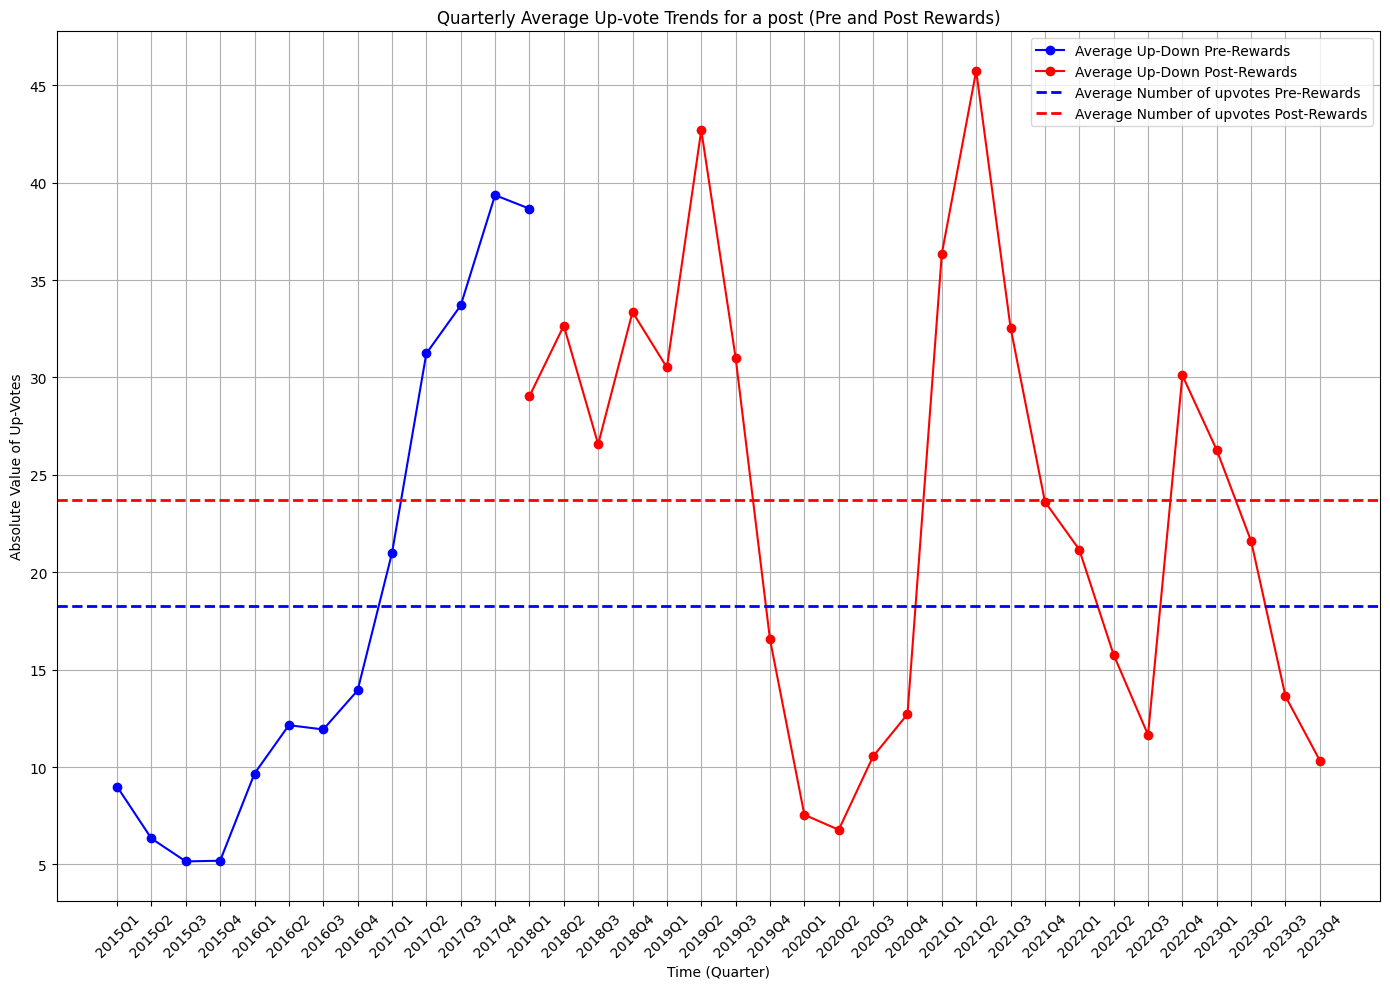

In [8]:
pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_pre = pre_rewards.groupby('YearQuarter')['Up-Down'].mean()

post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_post = post_rewards.groupby('YearQuarter')['Up-Down'].mean()

plt.figure(figsize=(14, 10))

plt.plot(quarterly_avg_pre.index.astype(str), quarterly_avg_pre, 
          label='Average Up-Down Pre-Rewards', marker='o', color='blue')

plt.plot(quarterly_avg_post.index.astype(str), quarterly_avg_post, 
          label='Average Up-Down Post-Rewards', marker='o', color='red')
avg_post_per_quarter_pre = quarterly_avg_pre.mean()
plt.axhline(y=avg_post_per_quarter_pre, color='blue', linestyle='--', linewidth=2, 
            label='Average Number of upvotes Pre-Rewards')
avg_post_per_quarter_post = quarterly_avg_post.mean()
plt.axhline(y=avg_post_per_quarter_post, color='red', linestyle='--', linewidth=2, 
            label='Average Number of upvotes Post-Rewards')

plt.title('Quarterly Average Up-vote Trends for a post (Pre and Post Rewards)')
plt.xlabel('Time (Quarter)')
plt.ylabel('Absolute Value of Up-Votes')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Chart number of posts per quarter pre and post rewards


C:\Users\aless\AppData\Local\Temp\ipykernel_37512\4069724927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\4069724927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')


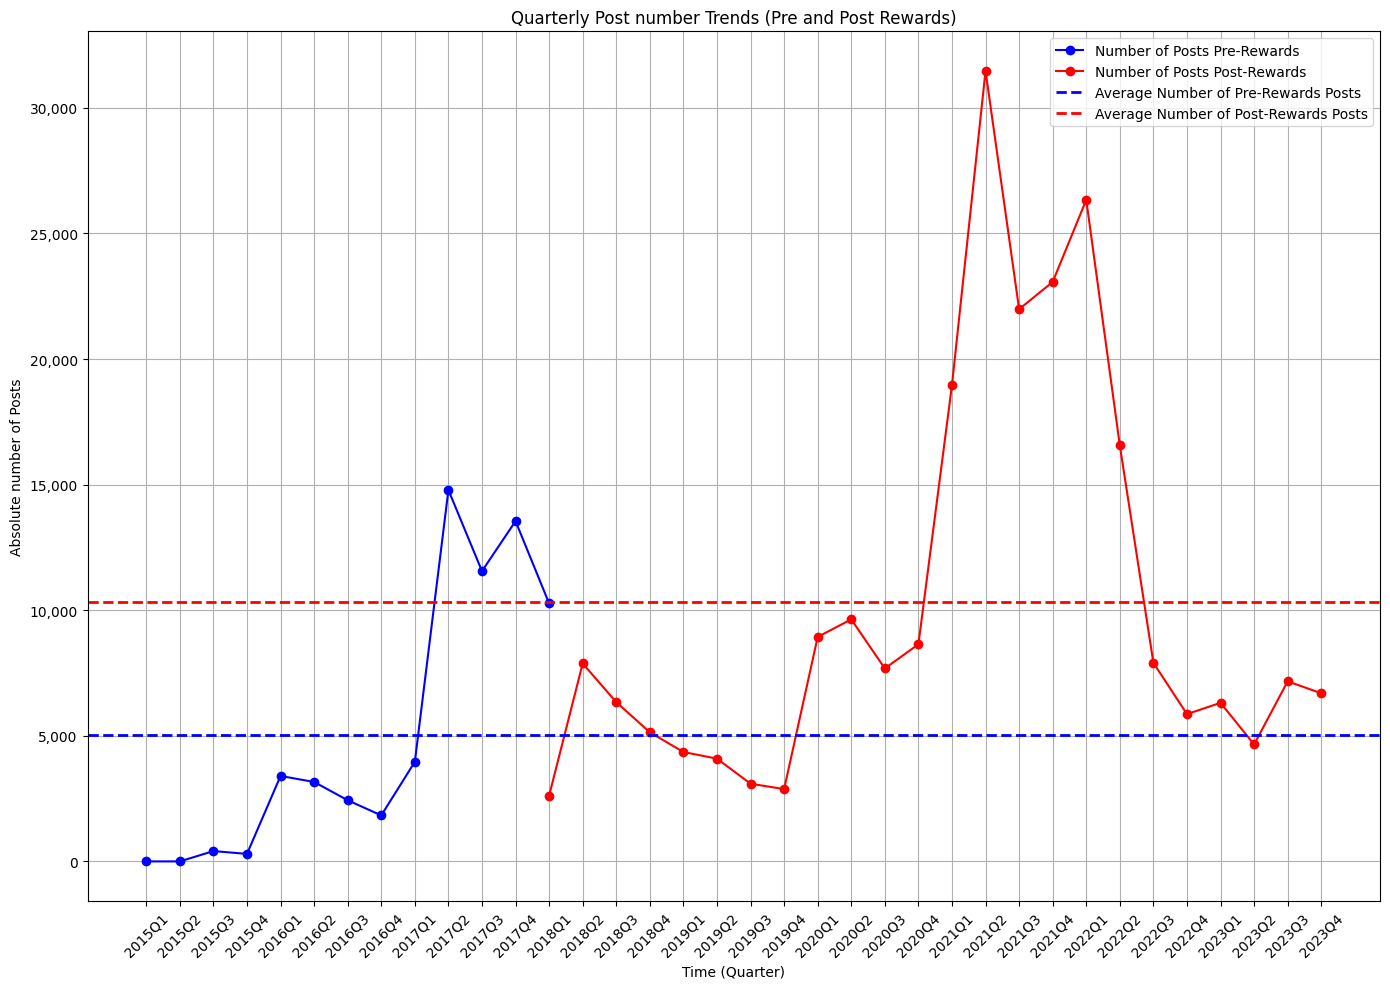

In [9]:
pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_pre = pre_rewards.groupby('YearQuarter')['Up-Down'].sum()
quarterly_post_count_pre = pre_rewards.groupby('YearQuarter').size()

post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_post = post_rewards.groupby('YearQuarter')['Up-Down'].sum()
quarterly_post_count_post = post_rewards.groupby('YearQuarter').size()


plt.figure(figsize=(14, 10))
plt.plot(quarterly_post_count_pre.index.astype(str), quarterly_post_count_pre, 
          label='Number of Posts Pre-Rewards', marker='o', color='blue')
plt.plot(quarterly_post_count_post.index.astype(str), quarterly_post_count_post, 
          label='Number of Posts Post-Rewards', marker='o', color='red')

avg_post_per_quarter_pre = quarterly_post_count_pre.mean()
avg_post_per_quarter_post = quarterly_post_count_post.mean()

plt.axhline(y=avg_post_per_quarter_pre, color='blue', linestyle='--', linewidth=2, 
            label='Average Number of Pre-Rewards Posts')
plt.axhline(y=avg_post_per_quarter_post, color='red', linestyle='--', linewidth=2, 
            label='Average Number of Post-Rewards Posts')



plt.title('Quarterly Post number Trends (Pre and Post Rewards)')
plt.xlabel('Time (Quarter)')
plt.ylabel('Absolute number of Posts')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Number of comments in the text --> pre-post analysis

In [10]:
file_zip = 'insert path of the folder of the data'       #"C:\\Users\\aless\\Desktop\\reddit_distr\\posts"

os.chdir(file_zip)

print("Files estratti:")
print(os.listdir())
comm=sorted(os.listdir())
comm=comm[:9]
comm = comm[:2] + comm[3:]
comm

Files estratti:
['r_ethtrader_comments_2016.jsonl', 'r_ethtrader_comments_2017.jsonl', 'r_ethtrader_comments_2018.jsonl', 'r_ethtrader_comments_2018_bkp.jsonl', 'r_ethtrader_comments_2019.jsonl', 'r_ethtrader_comments_2020.jsonl', 'r_ethtrader_comments_2021.jsonl', 'r_ethtrader_comments_2022.jsonl', 'r_ethtrader_comments_2023.jsonl', 'r_ethtrader_posts_2016.jsonl', 'r_ethtrader_posts_2017.jsonl', 'r_ethtrader_posts_2018.jsonl', 'r_ethtrader_posts_2019.jsonl', 'r_ethtrader_posts_2020.jsonl', 'r_ethtrader_posts_2021.jsonl', 'r_ethtrader_posts_2022.jsonl', 'r_ethtrader_posts_2023.jsonl']


['r_ethtrader_comments_2016.jsonl',
 'r_ethtrader_comments_2017.jsonl',
 'r_ethtrader_comments_2018_bkp.jsonl',
 'r_ethtrader_comments_2019.jsonl',
 'r_ethtrader_comments_2020.jsonl',
 'r_ethtrader_comments_2021.jsonl',
 'r_ethtrader_comments_2022.jsonl',
 'r_ethtrader_comments_2023.jsonl']

In [11]:
comments=pd.DataFrame()
for i in comm:
  print(i)
  author=[]
  text=[]
  up_down=[]
  year=[]
  retrieved_on=[]
  retrieved_utc=[]
  created_utc=[]
  link_id=[]
  parent_id=[]
  with open(i, 'r', encoding='UTF-8') as f:
      for line in f:
        line=json.loads(line)
        author.append(line['author'])
        link_id.append(line['link_id'])
        parent_id.append(line['parent_id'])
        
        all_text=line['body']
        text.append(all_text.replace('\n', ' '))
        
        up_down.append(line['ups'])
        retrieved_on.append(line.get('retrieved_on', np.nan))
        retrieved_utc.append(line.get('retrieved_utc', np.nan))
        created_utc.append(line.get('created_utc', np.nan))
        if '2016' in i:
          year.append('2016')
        elif '2017' in i:
          year.append('2017')
        elif '2018' in i:
          year.append('2018')
        elif '2019' in i:
          year.append('2019')
        elif '2020' in i:
          year.append('2020')
        elif '2021' in i:
          year.append('2021')
        elif '2022' in i:
          year.append('2022')
        elif '2023' in i:
          year.append('2023')
          

  data = pd.DataFrame({
      'Author': author,
      'Text': text,
      'Up-Down': up_down,
      'Year': year,
      'retrieved_utc': retrieved_utc,
      'created_utc': created_utc,
      'Retrieved_on': retrieved_on,
      'Link_id': link_id,
      'Parent_id': parent_id    
    })
  comments = pd.concat([comments, data], ignore_index=True)

comments

r_ethtrader_comments_2016.jsonl
r_ethtrader_comments_2017.jsonl
r_ethtrader_comments_2018_bkp.jsonl
r_ethtrader_comments_2019.jsonl
r_ethtrader_comments_2020.jsonl
r_ethtrader_comments_2021.jsonl
r_ethtrader_comments_2022.jsonl
r_ethtrader_comments_2023.jsonl


,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,Link_id,Parent_id
0,heliumcraft,Bitcoin has a huge sell pressure due to miners...,5,2016,NaN,1427297921,1.432006e+09,t3_309d4v,t3_309d4v
1,i3nikolai,Positively!,2,2016,NaN,1427308310,1.432010e+09,t3_309d4v,t3_309d4v
2,sfgfd,I have a sneaking suspicion that POS won't mea...,1,2016,NaN,1427311073,1.432011e+09,t3_309d4v,t3_309d4v
3,anthony334,It's very _simple_. There is _no doubt in my ...,3,2016,NaN,1427318863,1.432013e+09,t3_309d4v,t3_309d4v
4,fabreeze,Can you mine ether now?,1,2016,NaN,1427342004,1.432019e+09,t3_309d4v,t3_309d4v
...,...,...,...,...,...,...,...,...,...
5544548,Abdeliq,Good bot,1,2023,NaN,1704066757,1.704067e+09,t3_18v73no,t1_kfpdfv1
5544549,Abdeliq,Good bot,1,2023,NaN,1704066779,1.704067e+09,t3_18v73no,t1_kfpkkzg
5544550,Abdeliq,Good bot,1,2023,NaN,1704066804,1.704067e+09,t3_18v73no,t1_kfpkwdx
5544551,Abdeliq,Good bot,1,2023,NaN,1704066855,1.704067e+09,t3_18v73no,t1_kfqab6k


In [12]:
# average number of comments per post and average upvotes per post

comments['Retrieved_on'] = comments['Retrieved_on'].fillna(comments['retrieved_utc'])
comments['exact_data'] = pd.to_datetime(comments['Retrieved_on'], unit='s')


comments_sorted = comments.sort_values(by='exact_data')
df_oldest = comments_sorted.groupby('Link_id').first().reset_index()

comment_counts = comments.groupby('Link_id').count()['Author'].reset_index()
comment_counts.rename(columns={'Author': 'Comment_Count'}, inplace=True)

grouped_comments = pd.merge(df_oldest, comment_counts, on='Link_id')[[ 'Link_id', 'exact_data', 'Comment_Count','Up-Down']]
grouped_comments


,Link_id,exact_data,Comment_Count,Up-Down
0,t3_1000hkh,2023-01-06 16:34:39,1,1
1,t3_1000re9,2023-01-06 16:01:51,37,1
2,t3_1006x2i,2023-01-06 15:51:35,47,2
3,t3_1007tq2,2023-01-06 16:12:01,3,1
4,t3_1008c9f,2023-01-06 15:56:23,122,1
...,...,...,...,...
253071,t3_zzw8k6,2023-01-06 16:08:47,12,2
253072,t3_zzwfjr,2023-01-06 16:47:05,1,1
253073,t3_zzwpg9,2023-01-06 16:46:17,1,1
253074,t3_zzxoxf,2023-01-06 16:23:46,41,1


In [13]:
pre_rewards_comments = grouped_comments[grouped_comments['exact_data'] < pd.to_datetime('2018-03-04')]
pre_rewards_comments

,Link_id,exact_data,Comment_Count,Up-Down
23704,t3_309d4v,2015-05-19 03:34:00,9,5
23705,t3_30d1gd,2015-05-19 08:21:30,28,4
23706,t3_30n7k8,2015-05-20 01:51:16,7,1
23707,t3_30oaa4,2015-05-19 23:44:42,5,2
23708,t3_318y2v,2015-07-17 17:41:11,2,1
...,...,...,...,...
68541,t3_7zeajk,2018-03-03 22:10:51,4,1
68542,t3_7zebrj,2018-03-03 22:33:08,23,9
68546,t3_7zetk2,2018-03-03 22:43:17,17,1
68547,t3_7zf2ua,2018-03-03 23:09:33,9,3


In [14]:
post_rewards_comments = grouped_comments[~grouped_comments.index.isin(pre_rewards_comments.index)]
post_rewards_comments

,Link_id,exact_data,Comment_Count,Up-Down
0,t3_1000hkh,2023-01-06 16:34:39,1,1
1,t3_1000re9,2023-01-06 16:01:51,37,1
2,t3_1006x2i,2023-01-06 15:51:35,47,2
3,t3_1007tq2,2023-01-06 16:12:01,3,1
4,t3_1008c9f,2023-01-06 15:56:23,122,1
...,...,...,...,...
253071,t3_zzw8k6,2023-01-06 16:08:47,12,2
253072,t3_zzwfjr,2023-01-06 16:47:05,1,1
253073,t3_zzwpg9,2023-01-06 16:46:17,1,1
253074,t3_zzxoxf,2023-01-06 16:23:46,41,1


C:\Users\aless\AppData\Local\Temp\ipykernel_37512\1248883690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_rewards_comments['YearQuarter'] = pre_rewards_comments['exact_data'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\1248883690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_rewards_comments['YearQuarter'] = post_rewards_comments['exact_data'].dt.to_period('Q')


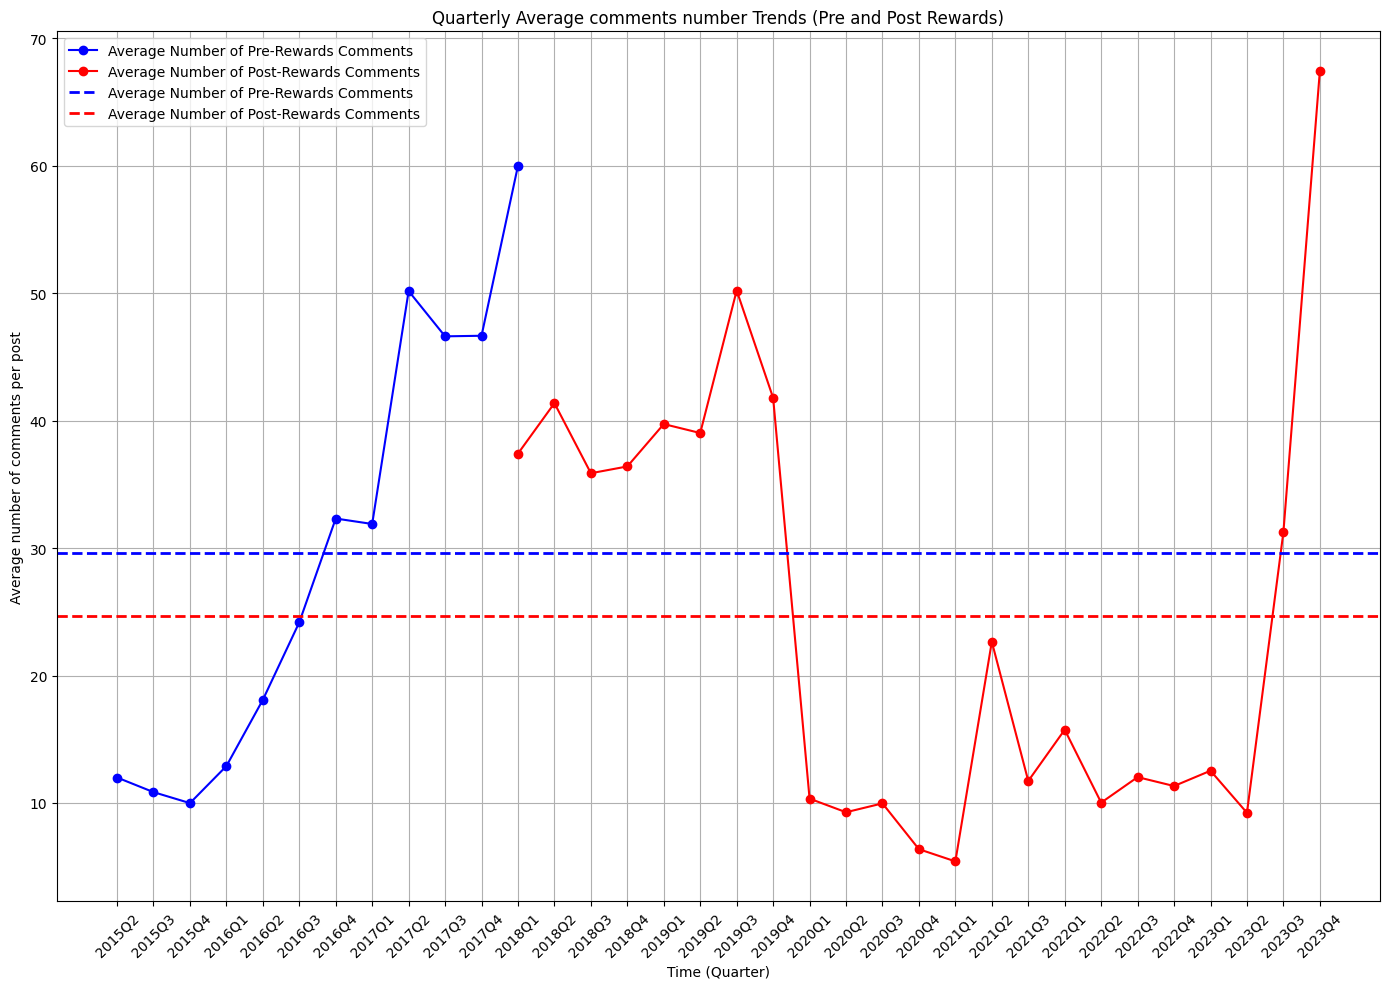

In [15]:

pre_rewards_comments['YearQuarter'] = pre_rewards_comments['exact_data'].dt.to_period('Q')
post_rewards_comments['YearQuarter'] = post_rewards_comments['exact_data'].dt.to_period('Q')


val_medio_x_temp_pre=pre_rewards_comments.groupby('YearQuarter').mean('Comment_Count')['Comment_Count']

val_medio_x_temp_post=post_rewards_comments.groupby('YearQuarter').mean('Comment_Count')['Comment_Count']


plt.figure(figsize=(14, 10))

plt.plot(val_medio_x_temp_pre.index.astype(str), val_medio_x_temp_pre, 
          label='Average Number of Pre-Rewards Comments', marker='o', color='blue')

plt.plot(val_medio_x_temp_post.index.astype(str), val_medio_x_temp_post, 
          label='Average Number of Post-Rewards Comments', marker='o', color='red')

avg_comments_per_quarter_pre = val_medio_x_temp_pre.mean()
avg_comments_per_quarter_post = val_medio_x_temp_post.mean()

plt.axhline(y=avg_comments_per_quarter_pre, color='blue', linestyle='--', linewidth=2, 
            label='Average Number of Pre-Rewards Comments')
plt.axhline(y=avg_comments_per_quarter_post, color='red', linestyle='--', linewidth=2, 
            label='Average Number of Post-Rewards Comments')


plt.title('Quarterly Average comments number Trends (Pre and Post Rewards)')
plt.xlabel('Time (Quarter)')
plt.ylabel('Average number of comments per post')
plt.xticks(rotation=45)
# Formattazione degli assi per mostrare valori assoluti
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# rewards analysis

In [16]:
file_zip = "C:\\Users\\aless\\Desktop\\reddit_distr"

os.chdir(file_zip)
print("Files estratti:")
print(os.listdir())

rewards=sorted(os.listdir())

string_list = [f"round_{str(i)}.csv" for i in range(93, 132)]

selected_rewards = [i for i in rewards if i in string_list]

selected_rewards

Files estratti:
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'donut.distribution-main.zip', 'ethtrader_initial_distribution_onchain_20191204.csv', 'posts', 'round_1.csv', '

['round_100.csv',
 'round_101.csv',
 'round_102.csv',
 'round_103.csv',
 'round_104.csv',
 'round_105.csv',
 'round_106.csv',
 'round_107.csv',
 'round_108.csv',
 'round_109.csv',
 'round_110.csv',
 'round_111.csv',
 'round_112.csv',
 'round_113.csv',
 'round_114.csv',
 'round_115.csv',
 'round_116.csv',
 'round_117.csv',
 'round_118.csv',
 'round_119.csv',
 'round_120.csv',
 'round_121.csv',
 'round_122.csv',
 'round_123.csv',
 'round_124.csv',
 'round_125.csv',
 'round_126.csv',
 'round_127.csv',
 'round_128.csv',
 'round_129.csv',
 'round_130.csv',
 'round_131.csv',
 'round_93.csv',
 'round_94.csv',
 'round_95.csv',
 'round_96.csv',
 'round_97.csv',
 'round_98.csv',
 'round_99.csv']

In [17]:
# ditionary creation for the exact date in its quarter
from datetime import datetime, timedelta
import calendar

end_date = datetime(2023, 9, 27)

days_between_rounds = 28

def get_round_date(end_date, round_number, days_between_rounds):
    return end_date - timedelta(days=(128 - round_number) * days_between_rounds)

def get_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4

rounds_info = []
for round_number in range(93, 132):  
    round_date = get_round_date(end_date, round_number, days_between_rounds)
    quarter = get_quarter(round_date)
    rounds_info.append((round_number, round_date.strftime('%d %B %Y'), f"Q{quarter}"))

# Stampa i risultati
diz= {}
for info in rounds_info:
    diz[f"round_{info[0]}.csv"] = f"{info[1][-4:]}{info[2]}"

diz  


{'round_93.csv': '2021Q1',
 'round_94.csv': '2021Q1',
 'round_95.csv': '2021Q1',
 'round_96.csv': '2021Q2',
 'round_97.csv': '2021Q2',
 'round_98.csv': '2021Q2',
 'round_99.csv': '2021Q3',
 'round_100.csv': '2021Q3',
 'round_101.csv': '2021Q3',
 'round_102.csv': '2021Q3',
 'round_103.csv': '2021Q4',
 'round_104.csv': '2021Q4',
 'round_105.csv': '2021Q4',
 'round_106.csv': '2022Q1',
 'round_107.csv': '2022Q1',
 'round_108.csv': '2022Q1',
 'round_109.csv': '2022Q2',
 'round_110.csv': '2022Q2',
 'round_111.csv': '2022Q2',
 'round_112.csv': '2022Q3',
 'round_113.csv': '2022Q3',
 'round_114.csv': '2022Q3',
 'round_115.csv': '2022Q3',
 'round_116.csv': '2022Q4',
 'round_117.csv': '2022Q4',
 'round_118.csv': '2022Q4',
 'round_119.csv': '2023Q1',
 'round_120.csv': '2023Q1',
 'round_121.csv': '2023Q1',
 'round_122.csv': '2023Q2',
 'round_123.csv': '2023Q2',
 'round_124.csv': '2023Q2',
 'round_125.csv': '2023Q3',
 'round_126.csv': '2023Q3',
 'round_127.csv': '2023Q3',
 'round_128.csv': '2023Q3',

In [18]:
selected_file = selected_rewards
all_rewards=pd.DataFrame()
for i in selected_file:
  print(i)
  data=pd.read_csv(i)
  data['Year_Quarter']=diz[i]
  all_rewards=pd.concat([all_rewards, data], ignore_index=True)

all_rewards=all_rewards[['username',	'contributor_type',	'points',	'Year_Quarter']]
all_rewards

round_100.csv
round_101.csv
round_102.csv
round_103.csv
round_104.csv
round_105.csv
round_106.csv
round_107.csv
round_108.csv
round_109.csv
round_110.csv
round_111.csv
round_112.csv
round_113.csv
round_114.csv
round_115.csv
round_116.csv
round_117.csv
round_118.csv
round_119.csv
round_120.csv
round_121.csv
round_122.csv
round_123.csv
round_124.csv
round_125.csv
round_126.csv
round_127.csv
round_128.csv
round_129.csv
round_130.csv
round_131.csv
round_93.csv
round_94.csv
round_95.csv
round_96.csv
round_97.csv
round_98.csv
round_99.csv


,username,contributor_type,points,Year_Quarter
0,u/JohnFrontino,contributor,257217.0,2021Q3
1,u/SacredHam00,contributor,206573.0,2021Q3
2,u/fitbhai,contributor,177265.0,2021Q3
3,u/roymustang261,contributor,169598.0,2021Q3
4,u/Hodling-Since2018,contributor,126399.0,2021Q3
...,...,...,...,...
19650,u/alicenekocat,contributor,37.0,2021Q3
19651,u/spookily1,contributor,37.0,2021Q3
19652,u/betweenthebars34,contributor,37.0,2021Q3
19653,u/kingjoeg,contributor,37.0,2021Q3


In [19]:
all_data['created_datetime'] = pd.to_datetime(all_data['created_utc'], unit='s')

start_date = '2021-01-01'
end_date = '2024-03-31'
filtered_data = all_data[(all_data['created_datetime'] >= start_date) & 
                         (all_data['created_datetime'] <= end_date)]

filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)
filtered_data['num_comments'] = filtered_data['num_comments'].fillna(0)

filtered_data


C:\Users\aless\AppData\Local\Temp\ipykernel_37512\2131731408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\2131731408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\2131731408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,exact_data,created_datetime,Year_Quarter
160154,SerialMasticator,"“Son, you should invest in tangible assets”",45,2021,1.623329e+09,1609459601,1.623329e+09,2,2021-01-01 00:06:41,2021-01-01 00:06:41,2021Q1
160155,EthTraderCommunity,The world of Polkadot (DOT): A 2020 year in re...,5,2021,1.623329e+09,1609459702,1.623329e+09,1,2021-01-01 00:08:22,2021-01-01 00:08:22,2021Q1
160157,Japs6991,Happy new year everyone! Happy tradings and th...,1,2021,1.623330e+09,1609466686,1.623330e+09,1,2021-01-01 02:04:46,2021-01-01 02:04:46,2021Q1
160158,devboricha,Checkmate,41,2021,1.623330e+09,1609471437,1.623330e+09,4,2021-01-01 03:23:57,2021-01-01 03:23:57,2021Q1
160159,MotherPop9,Desenvolvimento blockchain[removed],1,2021,1.623330e+09,1609472588,1.623330e+09,0,2021-01-01 03:43:08,2021-01-01 03:43:08,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1,2023-12-31 18:37:01,2023-12-31 18:37:01,2023Q4
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1,2023-12-31 19:44:23,2023-12-31 19:44:23,2023Q4
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1,2023-12-31 21:47:59,2023-12-31 21:47:59,2023Q4
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1,2023-12-31 23:11:00,2023-12-31 23:11:00,2023Q4


In [21]:
all_rewards['Author'] = [str(i)[2:] for i in all_rewards['username']]
all_rewards

,username,contributor_type,points,Year_Quarter,Author
0,u/JohnFrontino,contributor,257217.0,2021Q3,JohnFrontino
1,u/SacredHam00,contributor,206573.0,2021Q3,SacredHam00
2,u/fitbhai,contributor,177265.0,2021Q3,fitbhai
3,u/roymustang261,contributor,169598.0,2021Q3,roymustang261
4,u/Hodling-Since2018,contributor,126399.0,2021Q3,Hodling-Since2018
...,...,...,...,...,...
19650,u/alicenekocat,contributor,37.0,2021Q3,alicenekocat
19651,u/spookily1,contributor,37.0,2021Q3,spookily1
19652,u/betweenthebars34,contributor,37.0,2021Q3,betweenthebars34
19653,u/kingjoeg,contributor,37.0,2021Q3,kingjoeg


In [22]:
# Raggruppa per 'Year_Quarter' e 'Author'
filtered_data = filtered_data.groupby(['Year_Quarter', 'Author']).size().reset_index(name='Count')
all_rewards = all_rewards.groupby(['Year_Quarter', 'Author']).sum('points').reset_index()
filtered_data


,Year_Quarter,Author,Count
0,2021Q1,-0-O-,16
1,2021Q1,-AndyDufresne-,3
2,2021Q1,-Just_Another_Guy-,4
3,2021Q1,-S-I-D-,1
4,2021Q1,-_-DarthVader,1
...,...,...,...
36769,2023Q4,yangdhu,1
36770,2023Q4,yaykaboom,1
36771,2023Q4,yester_philippines,69
36772,2023Q4,yghookah21,1


## Qualità dei post

In [25]:
file_zip = "C:\\Users\\aless\\Desktop\\reddit_distr"

os.chdir(file_zip)
print("Files estratti:")
print(os.listdir())

rewards=sorted(os.listdir())

string_list = [f"round_{str(i)}.csv" for i in range(93, 132)]

selected_rewards = [i for i in rewards if i in string_list]

end_date = datetime(2023, 9, 27)

days_between_rounds = 28

def get_round_date(end_date, round_number, days_between_rounds):
    return end_date - timedelta(days=(128 - round_number) * days_between_rounds)

def get_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4

def get_month(date):
    return calendar.month_name[date.month]

rounds_info = []
for round_number in range(93, 132): 
    round_date = get_round_date(end_date, round_number, days_between_rounds)
    quarter = get_quarter(round_date)
    month = get_month(round_date)
    rounds_info.append((round_number, round_date.strftime('%d %B %Y'), f"Q{quarter}", month))

diz = {}
for info in rounds_info:
    round_file = f"round_{info[0]}.csv"
    date_str = info[1]
    month_str = info[3]
    diz[round_file] = f"{date_str[-4:]}-{date_str[:2]}"

print(diz)

all_rewards=pd.DataFrame()
for i in selected_file:
  data=pd.read_csv(i)
  data['Year-Month']=diz[i]
  all_rewards=pd.concat([all_rewards, data], ignore_index=True)

all_rewards=all_rewards[['username',	'contributor_type',	'points',	'Year-Month']]
all_rewards=all_rewards[all_rewards['contributor_type']=='contributor']
all_rewards['Author']=all_rewards['username'].str[2:]
all_rewards


Files estratti:
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'donut.distribution-main.zip', 'ethtrader_initial_distribution_onchain_20191204.csv', 'posts', 'round_1.csv', '

,username,contributor_type,points,Year-Month,Author
0,u/JohnFrontino,contributor,257217.0,2021-04,JohnFrontino
1,u/SacredHam00,contributor,206573.0,2021-04,SacredHam00
2,u/fitbhai,contributor,177265.0,2021-04,fitbhai
3,u/roymustang261,contributor,169598.0,2021-04,roymustang261
4,u/Hodling-Since2018,contributor,126399.0,2021-04,Hodling-Since2018
...,...,...,...,...,...
19650,u/alicenekocat,contributor,37.0,2021-07,alicenekocat
19651,u/spookily1,contributor,37.0,2021-07,spookily1
19652,u/betweenthebars34,contributor,37.0,2021-07,betweenthebars34
19653,u/kingjoeg,contributor,37.0,2021-07,kingjoeg


In [26]:
grouped_rewards = all_rewards.groupby(['Year-Month', 'Author']).mean('points').reset_index()
grouped_rewards

,Year-Month,Author,points
0,2021-01,-0-O-,100.0
1,2021-01,-CryptoMania,529.0
2,2021-01,-Jive-Turkey-,227.0
3,2021-01,-_Potato,75.0
4,2021-01,-pm-me-titties,100.0
...,...,...,...
16983,2023-30,whodontloveboobs,966.0
16984,2023-30,wmredditor,38.0
16985,2023-30,wright6c,2900.0
16986,2023-30,yester_philippines,5182.0


In [27]:
import pandas as pd
import numpy as np
from nltk import word_tokenize, sent_tokenize
from textstat import flesch_kincaid_grade, syllable_count

all_data['created_datetime'] = pd.to_datetime(all_data['created_utc'], unit='s')

filtered_data = all_data[all_data['created_datetime'] >= '2021-01-20']

filtered_data['Year-Month'] = filtered_data['created_datetime'].dt.to_period('M').astype(str)

def compute_text_features(text):
    # Readability Score (Punteggio di leggibilità)
    readability_score = flesch_kincaid_grade(text)
    
    # Tokenizzazione delle parole e delle frasi
    tokens = word_tokenize(text)
    sentences = sent_tokenize(text)
    
    # Calcolare il numero di parole, frasi, sillabe e altre caratteristiche
    num_words = len(tokens)
    num_sentences = len(sentences)
    num_syllables = syllable_count(text)
    length = len(text.split())
    
    # Type-Token Ratio (TTR) ponderato per la lunghezza del testo
    if num_words > 0:
        type_token_ratio = len(set(tokens)) / num_words * length
    else:
        type_token_ratio = 0
    
    # Lunghezza media delle frasi
    if num_sentences > 0:
        avg_sentence_length = num_words / num_sentences
    else:
        avg_sentence_length = 0
    
    return pd.Series([
        readability_score, type_token_ratio, length, num_words, 
        num_sentences, num_syllables, avg_sentence_length
    ])

text_features_all = filtered_data['Text'].apply(compute_text_features)

text_features_all.columns = [
    'Readability', 'TTR', 'Length', 'Num_Words', 
    'Num_Sentences', 'Num_Syllables', 'Avg_Sentence_Length'
]

filtered_data['Readability'] = text_features_all['Readability']
filtered_data['TTR'] = text_features_all['TTR']
filtered_data['Length'] = text_features_all['Length']
filtered_data['Num_Words'] = text_features_all['Num_Words']
filtered_data['Num_Sentences'] = text_features_all['Num_Sentences']
filtered_data['Num_Syllables'] = text_features_all['Num_Syllables']
filtered_data['Avg_Sentence_Length'] = text_features_all['Avg_Sentence_Length']

filtered_data.head()


C:\Users\aless\AppData\Local\Temp\ipykernel_37512\4265244939.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year-Month'] = filtered_data['created_datetime'].dt.to_period('M').astype(str)
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\4265244939.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Readability'] = text_features_all['Readability']
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\4265244939.py:57: SettingWithCopyWarning: 
A value is trying to be set on a 

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,exact_data,created_datetime,Year-Month,Readability,TTR,Length,Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length
162838,EthTraderCommunity,Venture investor explains why Ethereum is pois...,4,2021,1.623353e+09,1611100865,1.623353e+09,4,2021-01-20 00:01:05,2021-01-20 00:01:05,2021-01,3.6,13.0,13.0,14.0,1.0,16.0,14.000000
162841,MostPopularDude,Ethereum 2.0 closes in on $4B value locked as ...,2,2021,1.623353e+09,1611102915,1.623353e+09,1,2021-01-20 00:35:15,2021-01-20 00:35:15,2021-01,5.6,15.0,15.0,17.0,1.0,20.0,17.000000
162842,moneyredpill,New ETH All-Time High! Where Do We Go From Her...,4,2021,1.623353e+09,1611103730,1.623353e+09,2,2021-01-20 00:48:50,2021-01-20 00:48:50,2021-01,0.9,12.0,12.0,16.0,3.0,14.0,5.333333
162846,EthTraderCommunity,11 indicators that suggest Ether’s new ATH is ...,21,2021,1.623353e+09,1611107466,1.623353e+09,6,2021-01-20 01:51:06,2021-01-20 01:51:06,2021-01,6.4,11.0,11.0,13.0,1.0,17.0,13.000000
162847,jacobinvestor,Become Financial free📈📊[removed],1,2021,1.623353e+09,1611108063,1.623353e+09,1,2021-01-20 02:01:03,2021-01-20 02:01:03,2021-01,17.4,3.0,3.0,6.0,1.0,8.0,6.000000


In [41]:
comments['created_datetime'] = pd.to_datetime(comments['created_utc'], unit='s')

filtered_comments = comments[comments['created_datetime'] >= '2021-01-20']
filtered_comments['Year-Month'] = filtered_comments['created_datetime'].dt.to_period('M').astype(str)

def compute_text_features(text):
    readability_score = flesch_kincaid_grade(text)
    
    tokens = word_tokenize(text)
    if len(tokens) > 0:
        type_token_ratio = len(set(tokens)) / len(tokens)
        length = len(text.split())
        type_token_ratio = type_token_ratio* length
    else:
        type_token_ratio = 0
    
    return pd.Series([readability_score, type_token_ratio])

text_features_all = filtered_comments['Text'].apply(compute_text_features)
text_features_all.columns = ['Readability', 'TTR']
filtered_comments['Readability']=text_features_all['Readability']
filtered_comments['TTR']=text_features_all['TTR']
filtered_comments

C:\Users\aless\AppData\Local\Temp\ipykernel_37512\375917652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments['Year-Month'] = filtered_comments['created_datetime'].dt.to_period('M').astype(str)
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\375917652.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments['Readability']=text_features_all['Readability']
C:\Users\aless\AppData\Local\Temp\ipykernel_37512\375917652.py:22: SettingWithCopyWarning: 
A value is trying to be set

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,Link_id,Parent_id,exact_data,created_datetime,Year-Month,Readability,TTR
2831409,danieljin1234,Happy days,1,2021,NaN,1611100859,1.621527e+09,t3_l0i1ox,t3_l0i1ox,2021-05-20 16:14:04,2021-01-20 00:00:59,2021-01,2.9,2.000000
2831410,bosswiththecross,Are ya'll holding or selling? Would make a tid...,1,2021,NaN,1611100873,1.621527e+09,t3_l0i1ox,t3_l0i1ox,2021-05-20 16:14:16,2021-01-20 00:01:13,2021-01,3.6,26.000000
2831411,dreamypunk,Freeeeeeeeeeeedooooooommmmmmmm,1,2021,NaN,1611101325,1.621528e+09,t3_l0i1ox,t3_l0i1ox,2021-05-20 16:21:05,2021-01-20 00:08:45,2021-01,79.2,1.000000
2831412,bedla,"So you are excited about price ^(in BTC), right?",2,2021,NaN,1611101343,1.621528e+09,t3_l0wi5l,t3_l0wi5l,2021-05-20 16:21:21,2021-01-20 00:09:03,2021-01,2.1,9.000000
2831413,Basoosh,I watched KIN's case with the SEC very closely...,4,2021,NaN,1611101530,1.621528e+09,t3_kf251b,t1_gjvmqxa,2021-05-20 16:24:10,2021-01-20 00:12:10,2021-01,6.0,111.265487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544548,Abdeliq,Good bot,1,2023,NaN,1704066757,1.704067e+09,t3_18v73no,t1_kfpdfv1,2023-12-31 23:52:51,2023-12-31 23:52:37,2023-12,-3.1,2.000000
5544549,Abdeliq,Good bot,1,2023,NaN,1704066779,1.704067e+09,t3_18v73no,t1_kfpkkzg,2023-12-31 23:53:14,2023-12-31 23:52:59,2023-12,-3.1,2.000000
5544550,Abdeliq,Good bot,1,2023,NaN,1704066804,1.704067e+09,t3_18v73no,t1_kfpkwdx,2023-12-31 23:53:39,2023-12-31 23:53:24,2023-12,-3.1,2.000000
5544551,Abdeliq,Good bot,1,2023,NaN,1704066855,1.704067e+09,t3_18v73no,t1_kfqab6k,2023-12-31 23:54:31,2023-12-31 23:54:15,2023-12,-3.1,2.000000


In [31]:
filtered_data = filtered_data[filtered_data['Author'].isin(all_rewards['Author'])]
filtered_data

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,exact_data,created_datetime,Year-Month,Readability,TTR,Length,Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length
162838,EthTraderCommunity,Venture investor explains why Ethereum is pois...,4,2021,1.623353e+09,1611100865,1.623353e+09,4,2021-01-20 00:01:05,2021-01-20 00:01:05,2021-01,3.6,13.000000,13.0,14.0,1.0,16.0,14.000000
162841,MostPopularDude,Ethereum 2.0 closes in on $4B value locked as ...,2,2021,1.623353e+09,1611102915,1.623353e+09,1,2021-01-20 00:35:15,2021-01-20 00:35:15,2021-01,5.6,15.000000,15.0,17.0,1.0,20.0,17.000000
162846,EthTraderCommunity,11 indicators that suggest Ether’s new ATH is ...,21,2021,1.623353e+09,1611107466,1.623353e+09,6,2021-01-20 01:51:06,2021-01-20 01:51:06,2021-01,6.4,11.000000,11.0,13.0,1.0,17.0,13.000000
162848,EthTraderCommunity,Altcoins Spring Higher As Bitcoin Lingers Belo...,1,2021,1.623353e+09,1611108966,1.623353e+09,1,2021-01-20 02:16:06,2021-01-20 02:16:06,2021-01,6.4,12.000000,12.0,13.0,1.0,16.0,13.000000
162849,devboricha,"Ether, the world's second-biggest cryptocurren...",3,2021,1.623353e+09,1611109873,1.623353e+09,4,2021-01-20 02:31:13,2021-01-20 02:31:13,2021-01,8.0,11.200000,12.0,15.0,1.0,19.0,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365553,Boo-Lemon,It’s a Solanaissance: These 5 charts will cure...,0,2023,NaN,1704043122,1.704043e+09,1,2023-12-31 17:18:42,2023-12-31 17:18:42,2023-12,2.9,11.000000,11.0,14.0,1.0,13.0,14.000000
365555,bzzking,Sam Bankman-Fried will not receive a 2nd trial...,26,2023,NaN,1704045354,1.704045e+09,1,2023-12-31 17:55:54,2023-12-31 17:55:54,2023-12,8.7,243.079316,521.0,643.0,27.0,742.0,23.814815
365556,Lokiee0077,Goldman Sachs crypto head expects pension fund...,6,2023,NaN,1704045779,1.704046e+09,2,2023-12-31 18:02:59,2023-12-31 18:02:59,2023-12,11.4,48.410959,62.0,73.0,2.0,98.0,36.500000
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1,2023-12-31 21:47:59,2023-12-31 21:47:59,2023-12,5.2,8.000000,8.0,10.0,1.0,12.0,10.000000


In [32]:
nltk.download('punkt')

def calculate_text_metrics(text):
    metrics = {}
    
    # Length of post (in characters, including spaces and punctuation)
    metrics['Post Length (Chars)'] = len(text)
    
    # Number of words in the post
    metrics['Num_Words'] = len(nltk.word_tokenize(text))
    
    # Number of sentences in the post
    metrics['Num_Sentences'] = len(nltk.sent_tokenize(text))
    
    # Number of syllables in the post (using textstat)
    metrics['Num_Syllables'] = textstat.syllable_count(text)
    
    # Average sentence length (words per sentence)
    metrics['Avg_Sentence_Length'] = metrics['Num_Words'] / metrics['Num_Sentences'] if metrics['Num_Sentences'] > 0 else 0
    
    # Lix Readability Formula
    metrics['Lix'] = textstat.lix(text)
    
    # Gunning Fog Index
    metrics['Gunning Fog'] = textstat.gunning_fog(text)
    
    # Automated Readability Index (ARI)
    metrics['ARI'] = textstat.automated_readability_index(text)
    
    # Coleman-Liau Index
    metrics['Coleman-Liau'] = textstat.coleman_liau_index(text)
    
    # Flesch Reading Ease
    metrics['Reading Ease'] = textstat.flesch_reading_ease(text)
    
    # Flesch-Kincaid Grade Level
    metrics['Grade Level'] = textstat.flesch_kincaid_grade(text)
    
    return metrics

readability_metrics = filtered_data['Text'].apply(calculate_text_metrics)

readability_df = pd.DataFrame(list(readability_metrics))

correlation_df = pd.concat([filtered_data[['Author', 'Up-Down', 'num_comments', 'Year-Month']], readability_df], axis=1)

correlation_df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Author,Up-Down,num_comments,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
162838,EthTraderCommunity,4.0,4.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162841,MostPopularDude,2.0,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162846,EthTraderCommunity,21.0,6.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162848,EthTraderCommunity,1.0,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162849,devboricha,3.0,4.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106532,NaN,NaN,NaN,NaN,71.0,14.0,1.0,13.0,14.000000,38.27,4.40,10.2,12.62,94.15,2.9
106533,NaN,NaN,NaN,NaN,3061.0,643.0,27.0,742.0,23.814815,42.91,10.18,10.4,9.45,62.68,8.7
106534,NaN,NaN,NaN,NaN,408.0,73.0,2.0,98.0,36.500000,59.41,11.51,15.2,13.87,50.46,11.4
106535,NaN,NaN,NaN,NaN,52.0,10.0,1.0,12.0,10.000000,58.00,8.20,9.1,12.25,71.82,5.2


In [33]:
final_destra = correlation_df[['Author','Up-Down',	'num_comments',	'Year-Month']]
final_sinistra = correlation_df.drop(columns=['Author', 'Up-Down',	'num_comments',	'Year-Month'])

final_destra = final_destra[:106537]
final_sinistra = final_sinistra[106537:]
final_destra = final_destra.reset_index(drop=True)
final_sinistra = final_sinistra.reset_index(drop=True)
final_uniti = pd.concat([final_destra,final_sinistra], axis=1)
final_uniti


,Author,Up-Down,num_comments,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
0,EthTraderCommunity,4.0,4.0,2021-01,77.0,14.0,1.0,16.0,14.000000,43.77,5.20,8.6,9.96,92.12,3.6
1,MostPopularDude,2.0,1.0,2021-01,78.0,17.0,1.0,20.0,17.000000,28.33,6.00,6.2,5.73,81.63,5.6
2,EthTraderCommunity,21.0,6.0,2021-01,64.0,13.0,1.0,17.0,13.000000,47.36,8.04,7.2,9.49,68.77,6.4
3,EthTraderCommunity,1.0,1.0,2021-01,75.0,13.0,1.0,16.0,13.000000,44.33,4.40,11.5,14.25,68.77,6.4
4,devboricha,3.0,4.0,2021-01,83.0,15.0,1.0,19.0,15.000000,53.67,8.13,12.8,14.20,59.30,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106532,Boo-Lemon,0.0,1.0,2023-12,71.0,14.0,1.0,13.0,14.000000,38.27,4.40,10.2,12.62,94.15,2.9
106533,bzzking,26.0,1.0,2023-12,3061.0,643.0,27.0,742.0,23.814815,42.91,10.18,10.4,9.45,62.68,8.7
106534,Lokiee0077,6.0,2.0,2023-12,408.0,73.0,2.0,98.0,36.500000,59.41,11.51,15.2,13.87,50.46,11.4
106535,teeceaustralia,7.0,1.0,2023-12,52.0,10.0,1.0,12.0,10.000000,58.00,8.20,9.1,12.25,71.82,5.2


In [34]:
grouped = final_uniti.groupby(['Year-Month', 'Author']).agg({
    'Up-Down': 'sum',   
    'num_comments': 'sum',
    'Post Length (Chars)': 'mean',
    'Num_Words': 'mean',
    'Num_Sentences': 'mean',
    'Avg_Sentence_Length': 'mean',
    'Num_Syllables': 'mean',
    'Lix': 'mean',
    'Gunning Fog': 'mean',
    'ARI': 'mean',
    'Coleman-Liau': 'mean',
    'Reading Ease': 'mean',
    'Grade Level': 'mean'
}).reset_index()

grouped['num_posts']= list(final_uniti.groupby(['Year-Month', 'Author']).size())
grouped

,Year-Month,Author,Up-Down,num_comments,Post Length (Chars),Num_Words,Num_Sentences,Avg_Sentence_Length,Num_Syllables,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level,num_posts
0,2021-01,-0-O-,15.0,7.0,67.000000,12.000000,1.000000,12.000000,18.000000,53.440000,12.490000,14.000000,17.020000,28.500000,11.500000,1
1,2021-01,0xholdthedoor,59.0,4.0,16.500000,3.500000,1.000000,3.500000,4.250000,8.250000,1.300000,0.350000,-1.960000,93.560000,1.000000,4
2,2021-01,AbsurdPickle,3.0,2.0,14.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.200000,-1.200000,-2.380000,119.190000,-2.700000,1
3,2021-01,Accurate-Ad5252,1.0,0.0,45.000000,16.000000,4.000000,4.000000,9.000000,32.000000,2.800000,7.600000,4.940000,89.750000,2.500000,1
4,2021-01,Airdrop_finder,1775.0,161.0,43.400000,8.800000,1.000000,8.800000,10.800000,24.668000,4.464000,3.720000,4.478000,87.246000,3.020000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2023-12,rootpl,362.0,77.0,1070.476190,185.000000,6.428571,26.165449,227.571429,39.092381,8.954286,19.328571,19.947143,50.874762,9.628571,21
7028,2023-12,spacsandspacs,10.0,2.0,55.000000,11.000000,1.000000,11.000000,14.000000,42.330000,3.600000,7.700000,9.940000,62.340000,6.800000,1
7029,2023-12,teeceaustralia,81.0,86.0,78.447368,14.289474,1.026316,14.092105,18.710526,50.797368,8.939474,10.944737,13.123158,63.211316,7.289474,38
7030,2023-12,tonuorak,13.0,1.0,62.000000,10.000000,1.000000,10.000000,17.000000,50.000000,8.000000,8.500000,11.980000,52.870000,8.400000,1


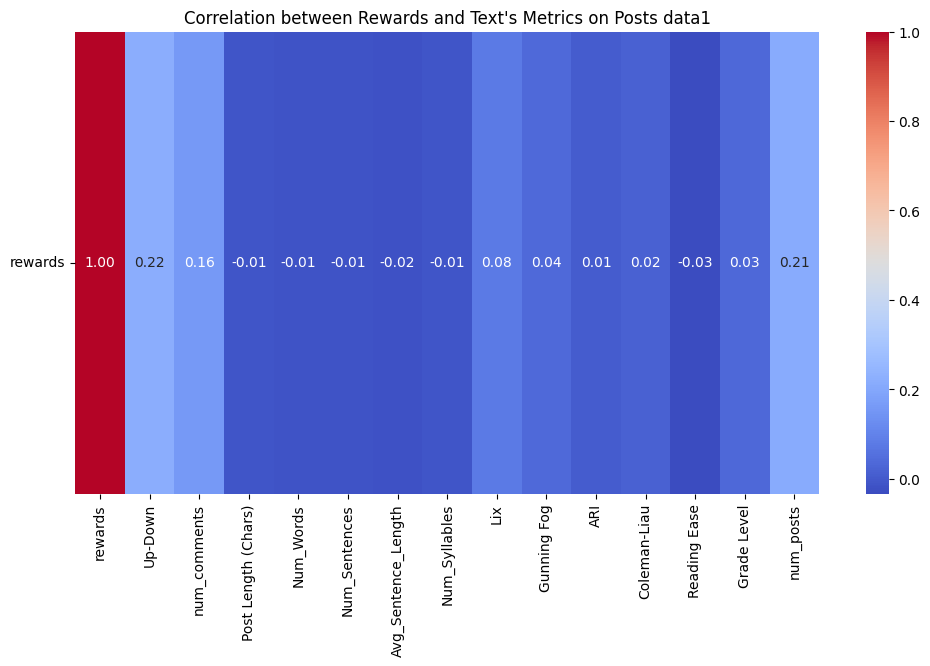

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


corr_post = pd.merge(grouped_rewards, grouped, on=['Year-Month', 'Author'], how='left')
corr_post = corr_post[corr_post['num_comments'] >= 0]
corr_post = corr_post.rename(columns={'points': 'rewards'})
qual_correlations = corr_post[['rewards', 'Up-Down', 'num_comments', 'Post Length (Chars)', 
                                'Num_Words', 'Num_Sentences', 'Avg_Sentence_Length', 
                                'Num_Syllables', 'Lix', 'Gunning Fog', 'ARI', 
                                'Coleman-Liau', 'Reading Ease', 'Grade Level', 
                                'num_posts']].corr(method='pearson')


points_correlations = qual_correlations.loc[['rewards']]

plt.figure(figsize=(12, 6))  
sns.heatmap(points_correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title("Correlation between Rewards and Text's Metrics on Posts data1")
plt.yticks(rotation=0)

plt.show()


In [42]:
filtered_comments = filtered_comments[filtered_comments['Author'].isin(all_rewards['Author'])]
filtered_comments

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,Link_id,Parent_id,exact_data,created_datetime,Year-Month,Readability,TTR
2831412,bedla,"So you are excited about price ^(in BTC), right?",2,2021,NaN,1611101343,1.621528e+09,t3_l0wi5l,t3_l0wi5l,2021-05-20 16:21:21,2021-01-20 00:09:03,2021-01,2.1,9.000000
2831413,Basoosh,I watched KIN's case with the SEC very closely...,4,2021,NaN,1611101530,1.621528e+09,t3_kf251b,t1_gjvmqxa,2021-05-20 16:24:10,2021-01-20 00:12:10,2021-01,6.0,111.265487
2831415,Basoosh,Imagine if there was a way to earn crypto for ...,2,2021,NaN,1611101850,1.621528e+09,t3_kf251b,t1_gjvd7r2,2021-05-20 16:28:51,2021-01-20 00:17:30,2021-01,2.9,15.157895
2831423,icofreak,and so are the prices. i had to check the date...,1,2021,NaN,1611103400,1.621530e+09,t3_l0wxn0,t1_gjw33ni,2021-05-20 16:51:59,2021-01-20 00:43:20,2021-01,1.5,19.173913
2831424,Enschede2,All time high,1,2021,NaN,1611103418,1.621530e+09,t3_l0njfn,t1_gjvxiix,2021-05-20 16:52:16,2021-01-20 00:43:38,2021-01,-2.7,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544538,Fredzoor,Happy new yeaaaaaar,3,2023,NaN,1704066513,1.704067e+09,t3_18uuc4n,t1_kfrk3rh,2023-12-31 23:48:51,2023-12-31 23:48:33,2023-12,0.9,3.000000
5544539,SigiNwanne,Happy new year Bronuts. May the odds of the ma...,3,2023,NaN,1704066521,1.704067e+09,t3_18uuc4n,t3_18uuc4n,2023-12-31 23:48:55,2023-12-31 23:48:41,2023-12,1.9,13.136364
5544540,Fredzoor,"Me!✋🏼 In fact, habd me some whiskey now, i’m ...",2,2023,NaN,1704066580,1.704067e+09,t3_18uuc4n,t1_kfrb22i,2023-12-31 23:49:55,2023-12-31 23:49:40,2023-12,1.7,10.352941
5544541,Fredzoor,Happy new yr bro !!,1,2023,NaN,1704066610,1.704067e+09,t3_18uuc4n,t1_kfqzayb,2023-12-31 23:50:28,2023-12-31 23:50:10,2023-12,1.3,4.166667


In [43]:
import pandas as pd
import textstat
import nltk

nltk.download('punkt')

def calculate_text_metrics(text):
    metrics = {}
    
    # Length of post 
    metrics['Post Length (Chars)'] = len(text)
    
    # Number of words in the post
    metrics['Num_Words'] = len(nltk.word_tokenize(text))
    
    # Number of sentences in the post
    metrics['Num_Sentences'] = len(nltk.sent_tokenize(text))
    
    # Number of syllables in the post 
    metrics['Num_Syllables'] = textstat.syllable_count(text)
    
    # Average sentence length 
    metrics['Avg_Sentence_Length'] = metrics['Num_Words'] / metrics['Num_Sentences'] if metrics['Num_Sentences'] > 0 else 0
    
    # Lix Readability Formula
    metrics['Lix'] = textstat.lix(text)
    
    # Gunning Fog Index
    metrics['Gunning Fog'] = textstat.gunning_fog(text)
    
    # Automated Readability Index (ARI)
    metrics['ARI'] = textstat.automated_readability_index(text)
    
    # Coleman-Liau Index
    metrics['Coleman-Liau'] = textstat.coleman_liau_index(text)
    
    # Flesch Reading Ease
    metrics['Reading Ease'] = textstat.flesch_reading_ease(text)
    
    # Flesch-Kincaid Grade Level
    metrics['Grade Level'] = textstat.flesch_kincaid_grade(text)
    
    return metrics

readability_metrics = filtered_comments['Text'].apply(calculate_text_metrics)

readability_df = pd.DataFrame(list(readability_metrics))
readability_df



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
0,48,14,1,11,14.000000,20.11,3.60,4.0,3.51,96.18,2.1
1,1059,226,12,258,18.833333,31.25,8.72,7.4,7.07,80.51,6.0
2,82,19,2,20,9.500000,26.75,5.70,2.0,3.20,88.74,2.9
3,99,23,2,23,11.500000,24.79,4.20,1.5,2.53,103.12,1.5
4,13,3,1,3,3.000000,3.00,1.20,-2.7,-4.29,119.19,-2.7
...,...,...,...,...,...,...,...,...,...,...,...
1318881,19,3,1,4,3.000000,36.33,1.20,6.8,7.32,93.81,0.9
1318882,87,22,4,20,5.500000,20.26,3.40,2.5,3.15,96.69,1.9
1318883,56,17,1,12,17.000000,29.18,4.40,3.3,2.13,102.61,1.7
1318884,19,6,2,5,3.000000,4.00,1.60,-1.9,-4.36,92.80,1.3


In [44]:
correlation_comm_df = pd.concat([filtered_comments[['Author', 'Up-Down',  'Year-Month']], readability_df], axis=1)
correlation_comm_df

,Author,Up-Down,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
2831412,bedla,2.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831413,Basoosh,4.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831415,Basoosh,2.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831423,icofreak,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831424,Enschede2,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318881,NaN,NaN,NaN,19.0,3.0,1.0,4.0,3.0,36.33,1.2,6.8,7.32,93.81,0.9
1318882,NaN,NaN,NaN,87.0,22.0,4.0,20.0,5.5,20.26,3.4,2.5,3.15,96.69,1.9
1318883,NaN,NaN,NaN,56.0,17.0,1.0,12.0,17.0,29.18,4.4,3.3,2.13,102.61,1.7
1318884,NaN,NaN,NaN,19.0,6.0,2.0,5.0,3.0,4.00,1.6,-1.9,-4.36,92.80,1.3


In [45]:
final_destra = correlation_comm_df[['Author','Up-Down',	'Year-Month']]
final_sinistra = correlation_comm_df.drop(columns=['Author', 'Up-Down',	'Year-Month'])

final_destra = final_destra[:1318886]
final_sinistra = final_sinistra[1318886:]
final_destra = final_destra.reset_index(drop=True)
final_sinistra = final_sinistra.reset_index(drop=True)
final_uniti = pd.concat([final_destra,final_sinistra], axis=1)
final_uniti


,Author,Up-Down,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
0,bedla,2.0,2021-01,48.0,14.0,1.0,11.0,14.000000,20.11,3.60,4.0,3.51,96.18,2.1
1,Basoosh,4.0,2021-01,1059.0,226.0,12.0,258.0,18.833333,31.25,8.72,7.4,7.07,80.51,6.0
2,Basoosh,2.0,2021-01,82.0,19.0,2.0,20.0,9.500000,26.75,5.70,2.0,3.20,88.74,2.9
3,icofreak,1.0,2021-01,99.0,23.0,2.0,23.0,11.500000,24.79,4.20,1.5,2.53,103.12,1.5
4,Enschede2,1.0,2021-01,13.0,3.0,1.0,3.0,3.000000,3.00,1.20,-2.7,-4.29,119.19,-2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318881,Fredzoor,3.0,2023-12,19.0,3.0,1.0,4.0,3.000000,36.33,1.20,6.8,7.32,93.81,0.9
1318882,SigiNwanne,3.0,2023-12,87.0,22.0,4.0,20.0,5.500000,20.26,3.40,2.5,3.15,96.69,1.9
1318883,Fredzoor,2.0,2023-12,56.0,17.0,1.0,12.0,17.000000,29.18,4.40,3.3,2.13,102.61,1.7
1318884,Fredzoor,1.0,2023-12,19.0,6.0,2.0,5.0,3.000000,4.00,1.60,-1.9,-4.36,92.80,1.3


In [46]:
grouped = final_uniti.groupby(['Year-Month', 'Author']).agg({
    'Up-Down': 'sum',   
    'Post Length (Chars)': 'mean',
    'Num_Words': 'mean',
    'Num_Sentences': 'mean',
    'Avg_Sentence_Length': 'mean',
    'Num_Syllables': 'mean',
    'Lix': 'mean',
    'Gunning Fog': 'mean',
    'ARI': 'mean',
    'Coleman-Liau': 'mean',
    'Reading Ease': 'mean',
    'Grade Level': 'mean'
}).reset_index()

grouped['num_comments']= list(final_uniti.groupby(['Year-Month', 'Author']).size())
grouped

,Year-Month,Author,Up-Down,Post Length (Chars),Num_Words,Num_Sentences,Avg_Sentence_Length,Num_Syllables,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level,num_comments
0,2021-01,-0-O-,30.0,216.692308,45.538462,2.769231,16.423077,52.769231,31.172308,7.309231,8.353846,5.994615,79.362308,5.669231,13
1,2021-01,-AndyDufresne-,25.0,24.857143,6.000000,1.000000,6.000000,6.142857,12.584286,1.942857,-0.442857,-6.734286,102.804286,0.085714,7
2,2021-01,-timenotspace-,12.0,201.400000,40.800000,2.200000,17.100000,48.800000,34.022000,8.378000,8.680000,8.334000,74.580000,6.640000,5
3,2021-01,3me_owen,61.0,36.242424,8.575758,1.363636,5.964646,9.151515,17.064242,3.484242,0.903030,-1.910303,95.246667,1.339394,33
4,2021-01,409h,4.0,124.000000,30.000000,2.000000,15.000000,30.000000,24.790000,6.100000,6.900000,7.460000,77.740000,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24626,2023-12,wen_eip,1210.0,64.938176,14.278207,1.205564,12.012519,15.366306,28.982937,5.899753,7.557960,4.696121,83.779134,3.997372,647
24627,2023-12,wizad23,2.0,37.500000,8.500000,1.500000,4.750000,9.000000,11.440000,4.575000,4.850000,-6.060000,105.740000,-0.600000,2
24628,2023-12,xMrDeex,8.0,49.750000,10.250000,1.250000,9.375000,10.250000,47.875000,15.817500,37.375000,32.092500,26.047500,11.450000,4
24629,2023-12,yester_philippines,2093.0,81.175527,17.359077,1.110331,16.646606,19.312939,36.075908,10.423210,18.939519,14.461003,55.376118,8.992678,997


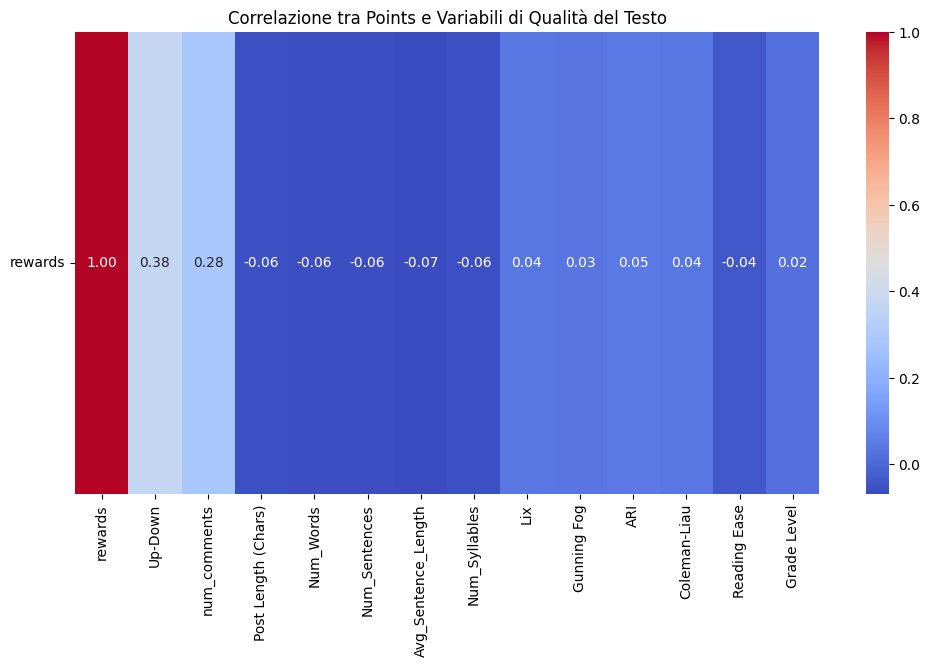

In [47]:
corr_post = pd.merge(grouped_rewards, grouped, on=['Year-Month', 'Author'], how='left')
corr_post = corr_post[corr_post['num_comments'] >= 0]
corr_post = corr_post.rename(columns={'points': 'rewards'})
qual_correlations = corr_post[['rewards', 'Up-Down', 'num_comments', 'Post Length (Chars)', 
                                'Num_Words', 'Num_Sentences', 'Avg_Sentence_Length', 
                                'Num_Syllables', 'Lix', 'Gunning Fog', 'ARI', 
                                'Coleman-Liau', 'Reading Ease', 'Grade Level']].corr(method='pearson')


points_correlations = qual_correlations.loc[['rewards']]

plt.figure(figsize=(12, 6))

sns.heatmap(points_correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlazione tra Points e Variabili di Qualità del Testo')
plt.yticks(rotation=0)

plt.show()
